In [15]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# Read csv file and format it

In [2]:
df = pd.read_csv("~/.local/share/survey/data.txt")
df.columns = ["timestamp", "mode", "count"]

In [3]:
df.head()

,timestamp,mode,count
0,1706518533,150,129330
1,1706518642,150,129480
2,1706518728,150,129630
3,1706518841,150,129780
4,1706518959,150,129930


In [4]:
df["date"] = df["timestamp"].apply(dt.datetime.fromtimestamp)
df.head()

,timestamp,mode,count,date
0,1706518533,150,129330,2024-01-29 09:55:33
1,1706518642,150,129480,2024-01-29 09:57:22
2,1706518728,150,129630,2024-01-29 09:58:48
3,1706518841,150,129780,2024-01-29 10:00:41
4,1706518959,150,129930,2024-01-29 10:02:39


# Evaluate seconds worked each day in the current month

In [9]:
df_month = df[df["date"].apply(lambda x: x.month == dt.datetime.now().month)]
df_day = df_month.copy()
df_day["day"] = df_day["date"].apply(lambda x: x.day)
df_day.head()

,timestamp,mode,count,date,day
205,1706862001,180,164540,2024-02-02 09:20:01,2
206,1706862075,180,164720,2024-02-02 09:21:15,2
207,1706862165,180,164900,2024-02-02 09:22:45,2
208,1706862205,180,165080,2024-02-02 09:23:25,2
209,1706862251,180,165260,2024-02-02 09:24:11,2


In [6]:
df2 = pd.DataFrame(df_day["mode"].groupby(df_day["day"]).sum())
df2.head()

,mode
day,
2,9720
3,24450
4,27840
5,150
7,20900


In [7]:
def format_func(x, pos):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    seconds = int(x%60)

    return "{:d}:{:02d}".format(hours, minutes)
    # return "{:d}:{:02d}:{:02d}".format(hours, minutes, seconds)

formatter = ticker.FuncFormatter(format_func)

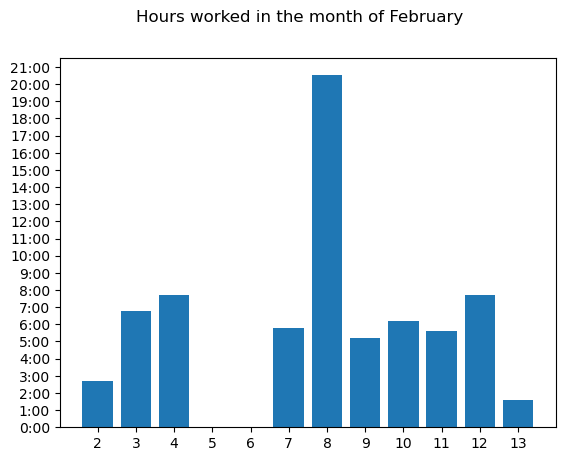

In [8]:
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.bar(df2.index, df2["mode"])

f.suptitle("Hours worked in the month of " + dt.datetime.now().strftime("%B"))
ax.yaxis.set_major_formatter(formatter)
# this locates y-ticks at the hours
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=3600))
# this ensures each bar has a 'date' label
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))

In [24]:
plt.savefig(os.path.expanduser("~/.local/share/survey/images/hour_month.png"))

<Figure size 640x480 with 0 Axes>